# Predicting the Functionality of  Tanzanian Water Wells

By Group 12:

1. Vivian Maiyo

2. George Tido

3. Caroline Kisaulu

4. Caroline Ngabu

5. Lewis Gitari

6. Faith Gitau

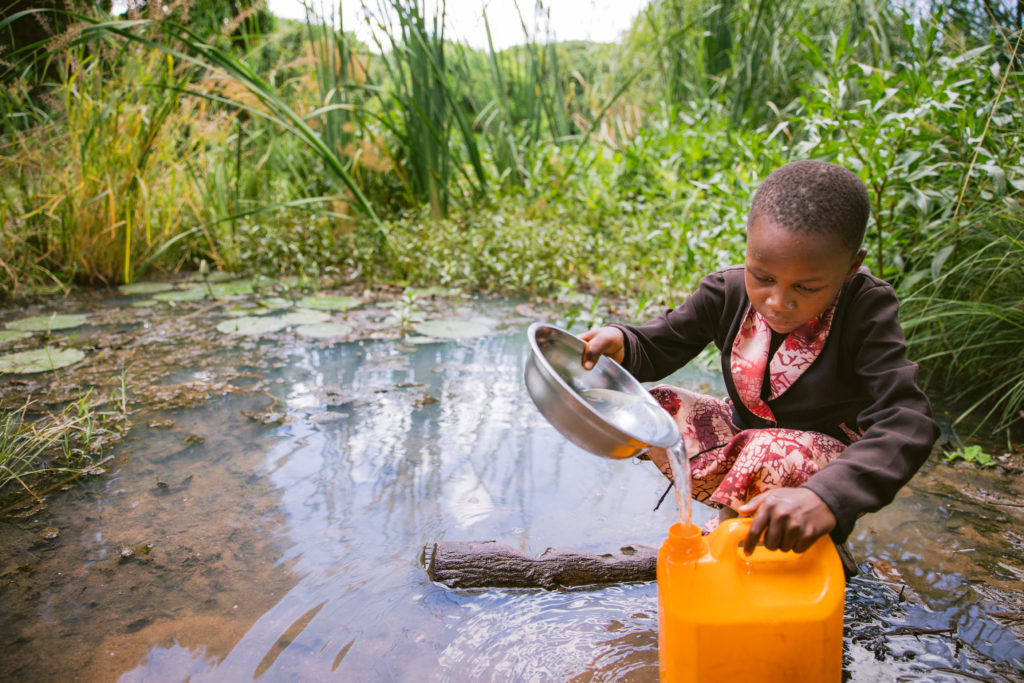

## Overview

According to a report by World Bank, 39% of Tanzanians do not have access to basic water supply. Consequently, sanitation is also very poor with more than half of the population lacking access to basic sanitation. Installation of wells has been a frontline measure in trying to resolve the water crisis in Tanzania. The Tanzanian government, foreign donor organizations, churches and faith-based organizations, and even the villagers have all been involved in funding and installation of wells. Some of the installed wells however cease to function over time while others remain in dilapidated conditions needing repair. A high number of dilapidated and non-functional wells can hamper the benefits being achieved by the well installations and compound the crisis further. It is therefore important to monitor the wells being built to ensure they remain functional. As representatives of an NGO contracted by the government to ensure the installed wells are maintained and repaired to remain functional, we were tasked to come up with machine learning model that can predict the functional status wells in Tanzania. This should help direct stakeholders and policy makers attention to where wells  need attention to ensure the gains in solving the water crisis are not lost.

## Business Problem

39% of Tanzanians lack access to basic water supply. While wells have been installed as a solution to the water crisis, there is lack of reliable infrastructure for monitoring and maintaining water wells. This leads to inefficiencies in resource allocation and delays in addressing non functional wells and functional wells that need repair. 
The traditional approaches in management of wells are ineffective as a high proportion of installed water wells cease to function over time while others remain in dilapidated conditions needing repair for a long time. There is need for stakeholders and policy makers to be able to know which wells are likely to be non functional or to need repairs, so they can focus their attention and resources there. 

## Data Understanding

The data was accessed from DrivenData Labs. It consists over 70,000 records split into training set labels, training set values, test set values and test set labels(also named submission format on the website). For the purposes of this project, we accessed the training set values and training set labels data with over 59,000 records, which we merged together for our analysis. each record contains various features describing aspects of the wells such as geographical location, year of constuction, funders and installers, water quality, quantity and source type, and management of the wells amongst other features. 

#### Features of the data

- **amount_tsh** - Total static head (amount water available to waterpoint)
- **date_recorded** - The date the row was entered
- **funder** - Who funded the well
- **gps_height** - Altitude of the well
- **installer** - Organization that installed the well
- **longitude** - GPS coordinate
- **latitude** - GPS coordinate
- **wpt_name** - Name of the waterpoint if there is one
- **num_private** -
- **basin** - Geographic water basin
- **subvillage** - Geographic location
- **region** - Geographic location
- **region_code** - Geographic location (coded)
- **district_code** - Geographic location (coded)
- **lga** - Geographic location
- **ward** - Geographic location
- **population** - Population around the well
- **public_meeting** - True/False
- **recorded_by** - Group entering this row of data
- **scheme_management** - Who operates the waterpoint
- **scheme_name** - Who operates the waterpoint
- **permit** - If the waterpoint is permitted
- **construction_year** - Year the waterpoint was constructed
- **extraction_type** - The kind of extraction the waterpoint uses
- **extraction_type_group** - The kind of extraction the waterpoint uses
- **extraction_type_class** - The kind of extraction the waterpoint uses
- **management** - How the waterpoint is managed
- **management_group** - How the waterpoint is managed
- **payment** - What the water costs
- **payment_type** - What the water costs
- **water_quality** - The quality of the water
- **quality_group** - The quality of the water
- **quantity** - The quantity of water
- **quantity_group** - The quantity of water
- **source** - The source of the water
- **source_type** - The source of the water
- **source_class** - The source of the water
- **waterpoint_type** - The kind of waterpoint
- **waterpoint_type_group** - The kind of waterpoint

## Research Questions

1. Which features are related to the functional status of wells in Tanzania
2. Which model best predicts the the functional status of the wells
3. Which areas can the government and stakeholders focus on to ensure that wells remain in a functioning state. 

## Data Preparation

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, f1_score, precision_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#Loading the training-set-values dataset as downloaded
training = pd.read_csv('data/Training-set-values.csv')
#Previewing the first 5 lines
training.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#Setting pandas to display all the rows in the output 
#and the best fit for columns
#pd.options.display.max_columns = 0
#pd.options.display.max_rows = None

In [4]:
#Checking training data shape
training.shape

(59400, 40)

In [5]:
#Loading the test-set-values dataset as downloaded
test = pd.read_csv('data/Test-set-values.csv')
#Previewing the first 5 lines
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
#Checking the shape of the test dataset
test.shape

(14850, 40)

We'll start by concatenating the training set values and the test set values datasets downloaded so as to perform initial data cleaning and scrubbing together. 

In [7]:
#Concatenating the training and testing data sets
X = pd.concat([training, test])
X.shape

(74250, 40)

In [8]:
#Checking for duplicated rows in the concatenated data set
duplicateRows = X[X.duplicated()]
duplicateRows

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


The resulting dataset has a shape of 74,250 rows and 40 columns and no duplicated rows. 

In [9]:
#Loading the outcome dataset
outcome = pd.read_csv('data/Training-set-labels.csv')
#Previewing the first 5 lines
outcome.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
#Checking the outcome dataset shape
outcome.shape

(59400, 2)

We'll proceed to merge the concatenated data set with the outcomes data set before starting the data cleaning process. 

In [11]:
#Merging the datasets
df = pd.merge(outcome, X, how = 'inner', on='id')
#Checking the first 5 lines of the merged dataset
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [12]:
#Checking the shape of the merged dataset
df.shape

(59400, 41)

In [13]:
#Checking for duplicated Rows in the merged Dataset
df_duplicates = df[df.duplicated()]
df_duplicates

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


The resulting dataset has 59,400 rows and 41 columns. 

This means that only 59,400 rows in the concatenated data set had matching IDs with the outcome dataset.

The dataset does not have any duplicated rows. 

We'll proceed with this dataset 

In [14]:
#Checking data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [15]:
#Checking the numerical columns
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [16]:
#Checking the number and percentage of missing values in the dataset
no_missing = df.isna().sum()
percent_missing = (df.isna().sum() * 100 / len(df)).round(2)
missing_value_df = pd.DataFrame({'no_missing_values': no_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,no_missing_values,percent_missing
id,0,0.00
status_group,0,0.00
amount_tsh,0,0.00
date_recorded,0,0.00
funder,3635,6.12
gps_height,0,0.00
installer,3655,6.15
longitude,0,0.00
latitude,0,0.00
wpt_name,0,0.00


In [17]:
#Checking for the number of unique values in the columns
data_type = df.dtypes
no_unique_values = df.nunique()
unique_values_df = pd.DataFrame({'data_type': data_type,
                                 'unique_values': no_unique_values})
unique_values_df


,data_type,unique_values
id,int64,59400
status_group,object,3
amount_tsh,float64,98
date_recorded,object,356
funder,object,1897
gps_height,int64,2428
installer,object,2145
longitude,float64,57516
latitude,float64,57517
wpt_name,object,37400


### Observations
The columns contain integer, float and object data types

7 columns have missing values
The columns, funder, installer and scheme_management have an average of 6% of values missing; public_meeting and permit an average of 5% of values missing and subvillage 0.6% of values missing
The column scheme_name has the highest percentage of values missing at 47%. 

The categorical columns date_recorded, funder, installer, wpt_name, subvillage, ward and scheme_name have a very high number of unique values in the columns ranging from 356 to 37400. 
This will prove tricky during one-hot-encoding so we'll have to find a way of reducing the number of unique values. 


## Data Cleaning

In this section, we'll investigate the data column by column to clean it

In [18]:
#Investigating the target
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Our target variable is a ternary variable(3 classes). 
It has class imbalance as the first class(functional) accounts for approximately 54% of the values, the second class (non functional) approximately 38% and the third class (functional needs repair) approximately 7%.

In [19]:
df['amount_tsh'].value_counts(dropna=False, normalize=True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

The 'amount_tsh' column represents the total amount of water available to a well in terms of the total static head. 
70% of the values in this column are 0. However, we will leave it as it is for now as 0 in terms of total static head is a viable figure meaning the well is at the surface and there is no need for pumping. 

In [20]:
df['gps_height'].value_counts(dropna=False, normalize=True)

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64

'gps_height' is a numerical column with a high number of 0s, representing 34% of the values. However, since the column indicates the altitude of the well, zero is a valid figure as it represents the altitude at sea level. We,ll leave this column out for now. 

In [21]:
df['num_private'].value_counts(dropna=False, normalize=True)

0      0.987256
6      0.001364
1      0.001229
5      0.000774
8      0.000774
         ...   
180    0.000017
213    0.000017
23     0.000017
55     0.000017
94     0.000017
Name: num_private, Length: 65, dtype: float64

It is not clear from the data sets what this column represents as it does not have a label. Moreover, 98% of the values are a 0. We will therefore drop this column from our dataframe. 

In [22]:
df['population'].value_counts(dropna=False, normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

Population column represents the total population around the well. Approximately 35% of the population column values are 0. This could well mean that noone is living around these wells. We'll check the functionality of the wells around the areas where population is recorded as 0 to get a better glimpse of the situation.  

In [23]:
df_pop = df.loc[df['population']==0]
df_pop.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,19816,non functional,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,non functional,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,non functional,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,functional,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [24]:
#Investigating the wells around the areas with a population of 0 
df_pop.groupby('status_group').count()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,10048,11274,10033,11274,11274,11274,11274,...,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1464,1775,1462,1775,1775,1775,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,7753,8332,7755,8332,8332,8332,8332,...,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


There are functional wells around these areas where the population is zero. As such, the 0 might be more a case of missing data than an actual value. We will therefore fill the zeros with the population mean. 

In [25]:
#Extracting the data records without a population of 0 to compute the mean
df_mean = df.loc[df['population']!=0]
df_mean.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,37107.559115,447.787681,969.889634,36.074387,-6.139781,0.740788,16.076988,6.299456,281.087167,1961.399721
std,21406.803661,3706.770967,612.544787,2.586779,2.737733,15.288297,21.597996,11.303334,564.687660,263.994165
min,1.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,1.000000,0.000000
25%,18514.500000,0.000000,347.000000,34.715340,-8.388839,0.000000,4.000000,2.000000,40.000000,1986.000000
50%,37128.000000,0.000000,1135.000000,36.706815,-5.750877,0.000000,10.000000,3.000000,150.000000,2000.000000
75%,55505.500000,100.000000,1465.000000,37.940149,-3.597016,0.000000,16.000000,5.000000,324.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,67.000000,30500.000000,2013.000000


In [26]:
#Filling the 0 values with the population mean of 281
df['population'].replace(to_replace = 0, value =281, inplace=True)

In [27]:
#Checking the population column value counts again
df['population'].value_counts()

281     21385
1        7025
200      1940
150      1892
250      1681
        ...  
406         1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1048, dtype: int64

In [28]:
df['construction_year'].value_counts(dropna=False, normalize=True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

Construction year has a value of 0 in approximately 34% of the values. A 0 year is not valid in this case. 
we'll replace this value with the year median

In [29]:
#Getting the median year
median_val = int(df[df['construction_year'] != 0]['construction_year'].median())
#Replacing 0 values with the median
df['construction_year'].replace(to_replace = 0, value =median_val, inplace=True)

In [30]:
df['construction_year'].value_counts(normalize=True)

2000    0.383838
2010    0.044529
2008    0.043990
2009    0.042643
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1996    0.013653
1980    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

In [31]:
df['date_recorded'].value_counts(dropna=False, normalize=True)

2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
                ...   
2011-08-31    0.000017
2011-09-09    0.000017
2011-08-30    0.000017
2011-09-13    0.000017
2004-04-05    0.000017
Name: date_recorded, Length: 356, dtype: float64

### Feature Engineering

We will convert the construction_year and date_recorded columns to date time format and use them to engineer a new feature, age of the well, by subtracting the construction year from the year the data was collected. 

In [32]:
df["date_recorded"] = pd.to_datetime(df["date_recorded"])
df["date_of_record"] = df["date_recorded"].dt.year
df["construction_year"] = pd.to_datetime(df["construction_year"])
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,date_of_record
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011


In [33]:
#Coverting the columns back into integer format for ease of subtraction
df[["construction_year", "date_of_record"]] = df[["construction_year", "date_of_record"]].apply(pd.to_numeric)

In [34]:
#Calculating the age_of_well column
df['age_of_well'] = df["date_of_record"] - df["construction_year"]
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,date_of_record,age_of_well
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,12
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,4
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,27
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,11


In [35]:
df['age_of_well'].value_counts()

 11    14695
 12     5701
 13     4079
 3      2740
 1      2303
 2      2130
 5      1980
 4      1903
 7      1404
 6      1381
 8      1160
 14     1160
 33     1120
 15      993
 23      905
 10      868
 16      826
 9       814
 19      766
 27      762
 18      754
 28      709
 31      709
 35      647
 17      636
 39      601
 37      600
 26      589
 0       588
 25      583
 21      578
 29      564
 20      541
 41      488
 30      359
 43      356
 38      351
 36      325
 22      323
 24      261
 40      233
 34      184
 32      174
 53       91
 42       90
 50       84
 45       66
 46       48
 44       47
 48       41
 51       31
 49       25
 47       14
 52       11
-5         3
-4         2
-7         1
-1         1
-3         1
-2         1
Name: age_of_well, dtype: int64

There are a few wells whose values run into the negative. This is not a possibility since age of well was calculated at the point of data collection by subtracting the year of construction by the date of recording. We will therefore drop these values from our dataset.  

In [36]:
df = df.loc[df['age_of_well']> 0]
df['age_of_well'].value_counts()

11    14695
12     5701
13     4079
3      2740
1      2303
2      2130
5      1980
4      1903
7      1404
6      1381
8      1160
14     1160
33     1120
15      993
23      905
10      868
16      826
9       814
19      766
27      762
18      754
28      709
31      709
35      647
17      636
39      601
37      600
26      589
25      583
21      578
29      564
20      541
41      488
30      359
43      356
38      351
36      325
22      323
24      261
40      233
34      184
32      174
53       91
42       90
50       84
45       66
46       48
44       47
48       41
51       31
49       25
47       14
52       11
Name: age_of_well, dtype: int64

In [37]:
df['funder'].value_counts(dropna=False, normalize=True)

Government Of Tanzania    0.154108
NaN                       0.061817
Danida                    0.052956
Hesawa                    0.037447
Rwssp                     0.023366
                            ...   
Ramadhani M. Mvugalo      0.000017
Samsoni                   0.000017
Thomasi Busigaye          0.000017
Uniceg                    0.000017
African 2000 Network      0.000017
Name: funder, Length: 1873, dtype: float64

The column funder has a significant number of missing values as well as unknown values. The string values of the column also have a lot of mispellings leading to values being strewn across different categories. We'll clean up the names and replace the missing and 0 values with unkown to preserve data. 

In [38]:
df['funder'] = df['funder'].replace(to_replace = ('Tanzania Government', 'Government of Tanzania','Govt Of TZ', 'Tanza', 'Ta', 'Serikali', 'Serikari', 'Serikaru',
                                                  'Tz', 'Tanzania', 'Government'), value = 'Government Of Tanzania')

In [39]:
df['funder'] = df['funder'].replace(to_replace = ('villigers', 'Village Council', 'Village Council/ Haydom Luther',
                                                  'Village Government', 
                                                  'Village', 'Village Community', 'Sekei Village Community',
                                                  'Olgilai Village Community', 'Village Govt', 'Serikali Ya Kijiji',
                                                  'Kijiji', 'Nduku Village', 'Ngiresi Village Community',
                                                   'Serikali ya Kijiji', 'Villaers', 'Villege Council', 'Village Contribut',
                                                   'Village Office', 'Village Fund', 'Villagers Mpi',
                                                  'Buluga Subvillage Community', 'Kitiangare Village Community'), 
                                                   value ='Villagers')

In [40]:
df['funder'] = df['funder'].replace(to_replace = ('Nethalan', 'Netherlands', 'Nethe', 'Netherland', 'Holand',
                                                  'Uhoranzi', 'Mhoranzi', 'Holland'), 
                                                   value = 'Netherlands')

In [41]:
df['funder'] = df['funder'].replace(to_replace = ('Jaica', 'Jika', 'Jica','Jeica', 'Gaica'), value ='JICA')

In [42]:
df['funder'] = df['funder'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER', 'Fw', 'Finwater',
                                          'FINN WATER', 'Finw', 'FW', 'FinWater', 'FiNI WATER', 'Finn Water', 'Fin Water'), 
                                          value ='Fini Water')

In [43]:
df['funder'] = df['funder'].replace(to_replace = ('RC churc', 'Roman Catholic', 'RC CATHORIC', 'Roman Cathoric-same', 
                                           'Roman Church', 'Rc Church', 'Roman', 'Rc Ch', 'Rc Churc', 'Rc Church/centr',
                                           'Roman Catholic Rulenge Diocese', 'Rc Cathoric', 'Roman Cathoric - Kilomani',
                                           'Roman Cathoric', 'Rc Church/cefa', 'Church', 'Kanisa Katoliki', 
                                            'Kanisa Katoliki Lolovoni', 'Rcchurch/cefa'), 
                                            value ='R C Church')

df['funder'] = df['funder'].replace(to_replace = ('The People Of Japan', 'People Of Japan', 'People From Japan', 
                                                  'Japan Food', 'Japan Food Aid Counterpart','Japan Embassy'), 
                                                  value ='Japan')

df['funder'] = df['funder'].replace(to_replace = ('Lottery Club', 'Rotary I', 'Lotary Club', 'Rotaty Club'), 
                                                  value ='Rotary Club')

df['funder'] = df['funder'].replace(to_replace = ('China Government', 'Chani'), value ='China')

df['funder'] = df['funder'].replace(to_replace =('Mosque', 'Islam', 'Islamic Agency Tanzania', 'Moslem Foundation',
                                                 'Islamic Community', 'Islamic', 'Islamic Found'), 
                                                 value ='Muslims')

df['funder'] = df['funder'].replace(to_replace = ('Qwickwin', 'Quik', 'Kwik', 'Tquick Wings', 
                                                  'Kwikwiz', 'Quwkwin', 'Qwiqwi'), value ='Quick Wins')

df['funder'] = df['funder'].replace(to_replace = ('Hesaw', 'Hesawa And Concern Worldwide'), value ='HESAWA')

df['funder'] = df['funder'].replace(to_replace = ('Swedish', 'People of Sweden', 'Sweeden'), 
                                                 value ='Sweden')
df['funder'] = df['funder'].replace(to_replace = ('Germany Republi', 'A/co Germany'), value ='Germany')

df['funder'] = df['funder'].replace(to_replace = ('Water', 'Idara Ya Maji'), value ='Ministry Of Water')

In [44]:
df['funder'] = df['funder'].replace(to_replace = '0', value ='Unknown')
df['funder'] = df['funder'].fillna('Unknown')

In [45]:
df['funder'].value_counts(dropna=False, normalize=True)

Government Of Tanzania            0.157543
Unknown                           0.075098
Danida                            0.052956
Hesawa                            0.037447
Rwssp                             0.023366
                                    ...   
Hasnein Murij                     0.000017
Tanzaling                         0.000017
Nasan                             0.000017
Igolola Community                 0.000017
African Reflections Foundation    0.000017
Name: funder, Length: 1787, dtype: float64

The column still has too many categories to carry out one-hot encoding. We will reduce dimensionality by picking the top 10 categories with the highest number of variables and then categorising all the rest to others. 

In [46]:
top_15 = df['funder'].value_counts(normalize=True).head(15).index.tolist()  


df['funder'] = [type_ if type_ in top_15 else "Other" for type_ in df['funder']]


In [47]:
df['funder'].value_counts()

Other                     27930
Government Of Tanzania     9264
Unknown                    4416
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1299
Kkkt                       1286
World Vision               1245
Ministry Of Water          1224
Unicef                     1056
R C Church                  956
Fini Water                  919
Tasaf                       854
District Council            835
Dhv                         829
Name: funder, dtype: int64

In [48]:
df['installer'].value_counts(dropna=False, normalize=True)

DWE                     0.294645
NaN                     0.062157
Government              0.030322
RWE                     0.020509
Commu                   0.018026
                          ...   
QUIK                    0.000017
Ramadhani M. Mvugalo    0.000017
Samsoni                 0.000017
RWI                     0.000017
WSSP                    0.000017
Name: installer, Length: 2124, dtype: float64

The column installer has a lot of categories that are similar to the column 'funder'. We will therefore drop this column to minimise multicollinearity issues. 

In [49]:
df['wpt_name'].value_counts(dropna=False)

none                   3526
Shuleni                1726
Zahanati                820
Msikitini               529
Kanisani                318
                       ... 
Kwa Fred Mwenda           1
Kwa Mzee Yotamu           1
Kwa Saduka                1
Kwa Salaita Massawe       1
Kwa Emil Rungu            1
Name: wpt_name, Length: 37057, dtype: int64

The column water point name has no impact on the functionality of the wells and with its high number of unique values at 37,400, it will prove bothersome in modeling. We will therefore drop it.

In [50]:
df['basin'].value_counts(dropna=False)

Lake Victoria              10154
Pangani                     8841
Rufiji                      7825
Internal                    7766
Lake Tanganyika             6407
Wami / Ruvu                 5861
Lake Nyasa                  5036
Ruvuma / Southern Coast     4475
Lake Rukwa                  2438
Name: basin, dtype: int64

The column 'basin' has no missing values and no null or 0 values. We will therefore retain it as it is. 

### Public_meeting column

In [51]:
df['public_meeting'].value_counts(dropna=False)

True     50556
False     4987
NaN       3260
Name: public_meeting, dtype: int64

The column 'public_meeting' has 3260 missing values. We will create a third category called unknown to accomodate the null values. 

In [52]:
df['public_meeting'].fillna('unknown', inplace=True)
df['public_meeting'].value_counts()

True       50556
False       4987
unknown     3260
Name: public_meeting, dtype: int64

In [53]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    58803
Name: recorded_by, dtype: int64

The column 'recorded_by' contains only one value for all the values. It is therefore not important in modeling and we'll drop it. 

### Permit column

In [54]:
df['permit'].value_counts(dropna=False)

True     38406
False    17351
NaN       3046
Name: permit, dtype: int64

The column 'permit' which indicated whether a waterpoint is permitted or not has 3046 missing values. We'll create a third category of unknown to contain these records. 

In [55]:
df['permit'].fillna('unknown', inplace=True)
df['permit'].value_counts()

True       38406
False      17351
unknown     3046
Name: permit, dtype: int64

### Scheme_name column

In [56]:
df['scheme_name'].value_counts(dropna=False, normalize=True)

NaN                          0.474993
K                            0.011598
None                         0.010952
Borehole                     0.009234
M                            0.006802
                               ...   
Zahanati pipeline            0.000017
Mand                         0.000017
Shirimatunda water supply    0.000017
Kaseni water supply          0.000017
Windmili system              0.000017
Name: scheme_name, Length: 2677, dtype: float64

The column 'scheme_name' has the highest percentage of missing values at 47%. It also has 2696 unique values and the information contained therein has nothing to do with well function. We will therefore drop it. 

### Extraction_type, extraction_type_group and extraction_type_class columns

In [57]:
df['extraction_type'].value_counts(dropna=False)

gravity                      26454
nira/tanira                   8139
other                         6358
submersible                   4712
swn 80                        3661
mono                          2849
india mark ii                 2387
afridev                       1753
ksb                           1373
other - rope pump              423
other - swn 81                 229
windmill                       117
india mark iii                  97
cemo                            90
other - play pump               79
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [58]:
df['extraction_type_group'].value_counts(dropna=False)

gravity            26454
nira/tanira         8139
other               6358
submersible         6085
swn 80              3661
mono                2849
india mark ii       2387
afridev             1753
rope pump            423
other handpump       358
other motorpump      122
wind-powered         117
india mark iii        97
Name: extraction_type_group, dtype: int64

In [59]:
df['extraction_type_class'].value_counts(dropna=False)

gravity         26454
handpump        16395
other            6358
submersible      6085
motorpump        2971
rope pump         423
wind-powered      117
Name: extraction_type_class, dtype: int64

The three columns extraction_type, extraction_type_group and extraction_type class all contain similar information. We will retain the extraction_type_group column as it contains more categories and thus more data than extraction_type class and is cleaner than extraction_type

### Scheme_management, management and management_group columns

In [60]:
df['scheme_management'].value_counts(dropna=False)

VWC                 36528
WUG                  5158
NaN                  3819
Water authority      3114
WUA                  2825
Water Board          2725
Parastatal           1655
Private operator     1024
Company              1023
Other                 764
SWC                    97
Trust                  70
None                    1
Name: scheme_management, dtype: int64

In [61]:
df['management'].value_counts(dropna=False)

vwc                 40209
wug                  6427
water board          2910
wua                  2498
private operator     1883
parastatal           1743
water authority       898
other                 832
company               681
unknown               547
other - school         99
trust                  76
Name: management, dtype: int64

In [62]:
df['management_group'].value_counts(dropna=False)

user-group    52044
commercial     3538
parastatal     1743
other           931
unknown         547
Name: management_group, dtype: int64

The columns scheme_management, management and management_group also contain similar information. We will retain the management column as it contains more information than management group and it does not have null values. 
We'll replace the other - school category in this column by school

In [63]:
#Replacing other - school category in management with school
df['management'] = df['management'].replace(to_replace = ('other - school'), value ='school')
df['management'].value_counts()

vwc                 40209
wug                  6427
water board          2910
wua                  2498
private operator     1883
parastatal           1743
water authority       898
other                 832
company               681
unknown               547
school                 99
trust                  76
Name: management, dtype: int64

### Payment and payment_type columns

In [64]:
df['payment'].value_counts(dropna=False)

never pay                25176
pay per bucket            8886
pay monthly               8202
unknown                   8018
pay when scheme fails     3860
pay annually              3612
other                     1049
Name: payment, dtype: int64

In [65]:
df['payment_type'].value_counts(dropna=False)

never pay     25176
per bucket     8886
monthly        8202
unknown        8018
on failure     3860
annually       3612
other          1049
Name: payment_type, dtype: int64

The columns payment and payment_type also contain similar data. We will keep payment_type column and drop the payment column as it has cleaner categories. 

### Quantity and quantity_group columns

In [66]:
df['quantity'].value_counts(dropna=False)

enough          32763
insufficient    15046
dry              6212
seasonal         4029
unknown           753
Name: quantity, dtype: int64

In [67]:
df['quantity_group'].value_counts(dropna=False)

enough          32763
insufficient    15046
dry              6212
seasonal         4029
unknown           753
Name: quantity_group, dtype: int64

The two columns quantity and quantity_group also contain similar columns and identical categories. We will therefore retain quantity and drop quantity_group. 

### Water_quality and quality_group

In [68]:
df['water_quality'].value_counts(dropna=False)

soft                  50304
salty                  4823
unknown                1836
milky                   802
coloured                485
salty abandoned         337
fluoride                199
fluoride abandoned       17
Name: water_quality, dtype: int64

In [69]:
df['quality_group'].value_counts(dropna=False)

good        50304
salty        5160
unknown      1836
milky         802
colored       485
fluoride      216
Name: quality_group, dtype: int64

The columns water_quality and quality_group have similar information. We will therefore keep water_quality column as it has more information and drop quality_group column

### Source, source_type and source_class columns

In [70]:
df['source'].value_counts(dropna=False)

spring                  16834
shallow well            16740
machine dbh             10958
river                    9464
rainwater harvesting     2249
hand dtw                  872
lake                      759
dam                       654
other                     207
unknown                    66
Name: source, dtype: int64

In [71]:
df['source_type'].value_counts(dropna=False)

spring                  16834
shallow well            16740
borehole                11830
river/lake              10223
rainwater harvesting     2249
dam                       654
other                     273
Name: source_type, dtype: int64

In [72]:
df['source_class'].value_counts(dropna=False)

groundwater    45404
surface        13126
unknown          273
Name: source_class, dtype: int64

This is also another set of 3 columns(source, source_type and source_class) with similar information. We will keep the source column and drop the rest as it contains more information. 

### Waterpoint_type and waterpoint_type_group columns

In [73]:
df['waterpoint_type'].value_counts(dropna=False)

communal standpipe             28166
hand pump                      17395
other                           6311
communal standpipe multiple     6033
improved spring                  775
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [74]:
df['waterpoint_type_group'].value_counts(dropna=False)

communal standpipe    34199
hand pump             17395
other                  6311
improved spring         775
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

These two columns, waterpoint_type and waterpoint_type_group also contain similar information. We will retain the waterpoint_type_group column and drop the waterpoint_type column. 

In [75]:
#Dropping columns
to_be_dropped = ['id', 'installer', 'date_recorded', 'wpt_name', 'num_private', 'recorded_by', 'scheme_management', 
                 'management_group', 'scheme_name', 'extraction_type', 'extraction_type_class', 'payment', 
                 'quantity_group', 'quality_group', 'source_type', 'source_class', 'waterpoint_type',
                 'construction_year', 'date_of_record']

df = df.drop(to_be_dropped, axis=1)
df.head()

,status_group,amount_tsh,funder,gps_height,longitude,latitude,basin,subvillage,region,region_code,...,public_meeting,permit,extraction_type_group,management,payment_type,water_quality,quantity,source,waterpoint_type_group,age_of_well
0,functional,6000.0,R C Church,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,...,True,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,12
1,functional,0.0,Other,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,...,unknown,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,3
2,functional,25.0,Other,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,...,True,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,4
3,non functional,0.0,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,27
4,functional,0.0,Other,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,...,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,11


### Subvillage, lga and ward columns

In [76]:
df['subvillage'].value_counts(dropna=False)

Madukani        504
Shuleni         503
Majengo         501
Kati            371
NaN             369
               ... 
Ivugula Juu       1
Mwabung'Ando      1
Ibanga            1
Mtajuma           1
Damaygwa          1
Name: subvillage, Length: 19206, dtype: int64

In [77]:
df['ward'].value_counts(dropna=False)

Igosi        307
Imalinyi     252
Mdandu       231
Siha Kati    224
Nduruma      217
            ... 
Ukata          1
Kirongo        1
Rasbura        1
Linda          1
Kitete         1
Name: ward, Length: 2090, dtype: int64

In [78]:
df['lga'].value_counts(dropna=False)

Njombe          2442
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1175
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

The three columns subvillage, ward and lga contain geographical information. However, they have very many categories at 19287, 2092 and 125 respectively. Before we start selecting the topmost categories, we will explore other columns with geographical information to select the most relevant. 

### Region, region_code and district_code

In [79]:
df['region'].value_counts(dropna=False)

Iringa           5213
Shinyanga        4980
Mbeya            4639
Kilimanjaro      4326
Morogoro         3910
Kagera           3316
Arusha           3311
Mwanza           3074
Kigoma           2792
Ruvuma           2597
Pwani            2527
Tanga            2523
Dodoma           2201
Singida          2093
Tabora           1959
Mara             1905
Rukwa            1791
Mtwara           1723
Manyara          1575
Lindi            1543
Dar es Salaam     805
Name: region, dtype: int64

In [80]:
df['region_code'].value_counts(dropna=False)

11    5219
17    5009
12    4639
3     4326
5     3944
18    3324
19    3019
2     2985
16    2792
10    2597
4     2489
1     2201
13    2093
14    1979
20    1905
15    1791
21    1575
6     1536
80    1236
60     990
90     912
7      805
99     423
9      388
24     326
8      299
40       1
Name: region_code, dtype: int64

In [81]:
df['district_code'].value_counts(dropna=False)

1     11993
2     11147
3      9886
4      8902
5      4344
6      4037
7      3287
8      1038
30      995
33      865
53      726
43      491
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [82]:
to_be_dropped = ['subvillage', 'lga', 'ward', 'region_code', 'district_code']

df = df.drop(to_be_dropped, axis=1)
df.head()

,status_group,amount_tsh,funder,gps_height,longitude,latitude,basin,region,population,public_meeting,permit,extraction_type_group,management,payment_type,water_quality,quantity,source,waterpoint_type_group,age_of_well
0,functional,6000.0,R C Church,1390,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,12
1,functional,0.0,Other,1399,34.698766,-2.147466,Lake Victoria,Mara,280,unknown,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,3
2,functional,25.0,Other,686,37.460664,-3.821329,Pangani,Manyara,250,True,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,4
3,non functional,0.0,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,27
4,functional,0.0,Other,0,31.130847,-1.825359,Lake Victoria,Kagera,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,11


### Longitude and latitude

In [83]:
df['longitude'].value_counts(dropna=False, normalize=True)

0.000000     0.030815
32.982698    0.000034
32.978062    0.000034
32.987670    0.000034
39.088875    0.000034
               ...   
36.871976    0.000017
37.579803    0.000017
33.196490    0.000017
34.017119    0.000017
30.999792    0.000017
Name: longitude, Length: 56921, dtype: float64

In [84]:
#Exploring the zero longitude records further
df.loc[df['longitude'] == 0]

,status_group,amount_tsh,funder,gps_height,longitude,latitude,basin,region,population,public_meeting,permit,extraction_type_group,management,payment_type,water_quality,quantity,source,waterpoint_type_group,age_of_well
21,functional,0.0,Other,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,281,unknown,False,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,13
53,non functional,0.0,Government Of Tanzania,0,0.0,-2.000000e-08,Lake Victoria,Mwanza,281,True,True,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe,11
168,functional,0.0,Other,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,281,False,False,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,13
177,non functional,0.0,Other,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,281,unknown,False,other,wug,unknown,soft,enough,shallow well,other,13
253,functional needs repair,0.0,Hesawa,0,0.0,-2.000000e-08,Lake Victoria,Mwanza,281,True,True,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,functional needs repair,0.0,Other,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,281,True,False,nira/tanira,wug,other,soft,enough,shallow well,hand pump,11
59208,functional,0.0,Other,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,281,unknown,False,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,13
59295,functional needs repair,0.0,Rwssp,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,281,True,False,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,11
59324,functional,0.0,World Vision,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,281,unknown,False,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,13


The longitude column contains approximately 3% of zero values which are not possible based on Tanzania' location. Moreover, the records with zero value for longitude all have the same latitude value of -2e-08. 
Since all these values are the same and they only account for 3% of the data, we'll drop them so we can use the rest of the data for modeling. 

In [85]:
df = df.loc[df['longitude'] != 0]
df['longitude'].value_counts()

33.005032    2
32.982698    2
32.978062    2
32.987670    2
32.926012    2
            ..
37.579803    1
33.196490    1
34.017119    1
33.788326    1
35.005922    1
Name: longitude, Length: 56920, dtype: int64

In [86]:
df['latitude'].value_counts(dropna=False)

-7.065373     2
-2.515321     2
-7.177203     2
-6.963565     2
-6.983115     2
             ..
-1.971113     1
-10.539785    1
-9.162589     1
-4.463114     1
-2.598965     1
Name: latitude, Length: 56920, dtype: int64

## Exploration of Features

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56991 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           56991 non-null  object 
 1   amount_tsh             56991 non-null  float64
 2   funder                 56991 non-null  object 
 3   gps_height             56991 non-null  int64  
 4   longitude              56991 non-null  float64
 5   latitude               56991 non-null  float64
 6   basin                  56991 non-null  object 
 7   region                 56991 non-null  object 
 8   population             56991 non-null  int64  
 9   public_meeting         56991 non-null  object 
 10  permit                 56991 non-null  object 
 11  extraction_type_group  56991 non-null  object 
 12  management             56991 non-null  object 
 13  payment_type           56991 non-null  object 
 14  water_quality          56991 non-null  object 
 15  qu

### Target: Status Group

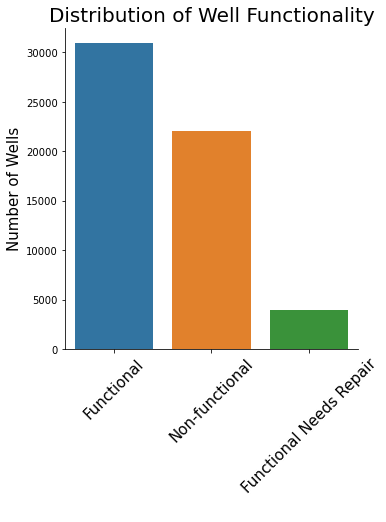

In [88]:
#Visualizing the status group column

# plot
ax = sns.catplot(data=df, x='status_group', kind='count', palette='tab10')

# Title and y-axis labels
plt.title('Distribution of Well Functionality', fontsize=20)
plt.ylabel('Number of Wells', fontsize=15)
plt.xlabel(' ', fontsize=15)

# X Labels
labels = ['Functional', 'Non-functional', 'Functional Needs Repair']
plt.xticks(ticks=(0,1,2), labels = labels, rotation = 45, fontsize = 15)

plt.show();

Slightly more than half of the wells are functional and the minority are functional but need repair. However, there is a significant proportion of wells that arent functioning. 

### Categorical Variables

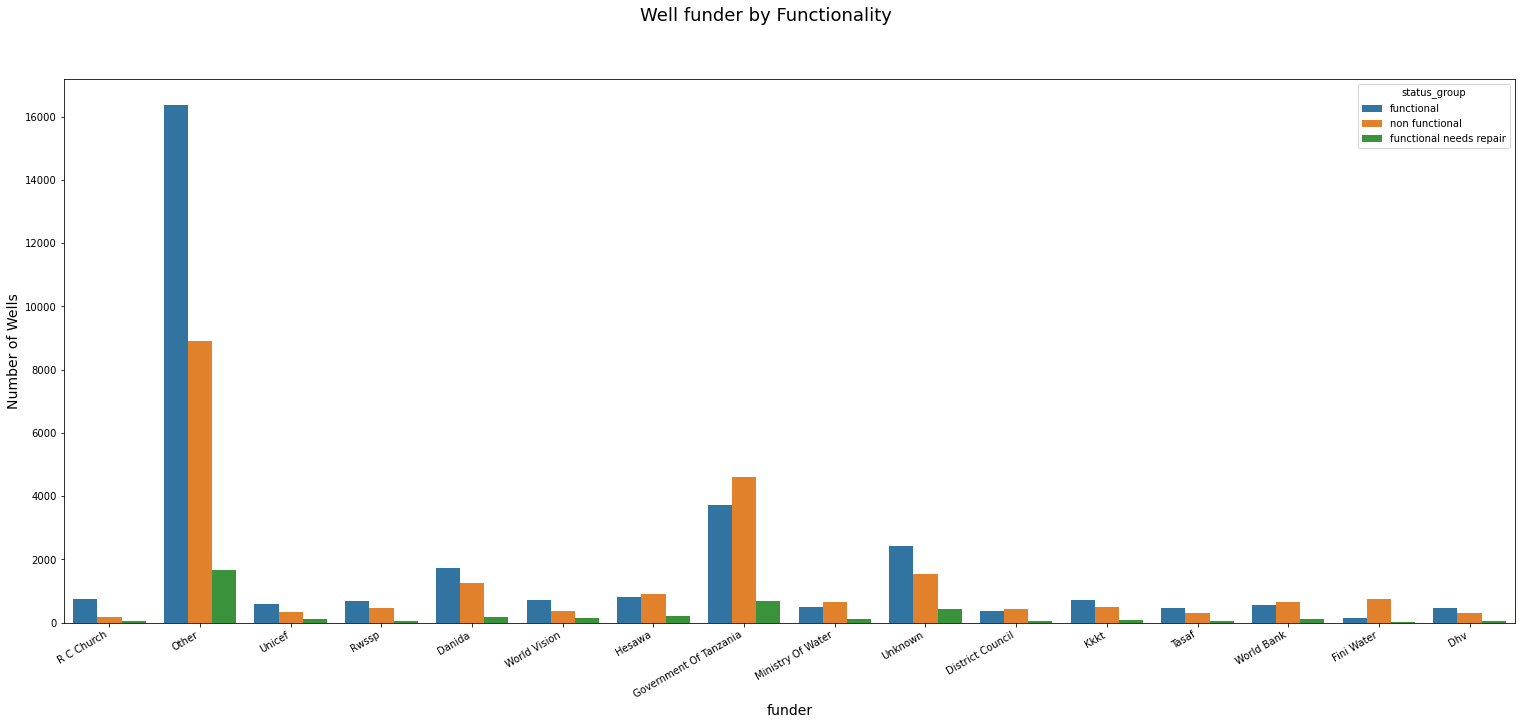

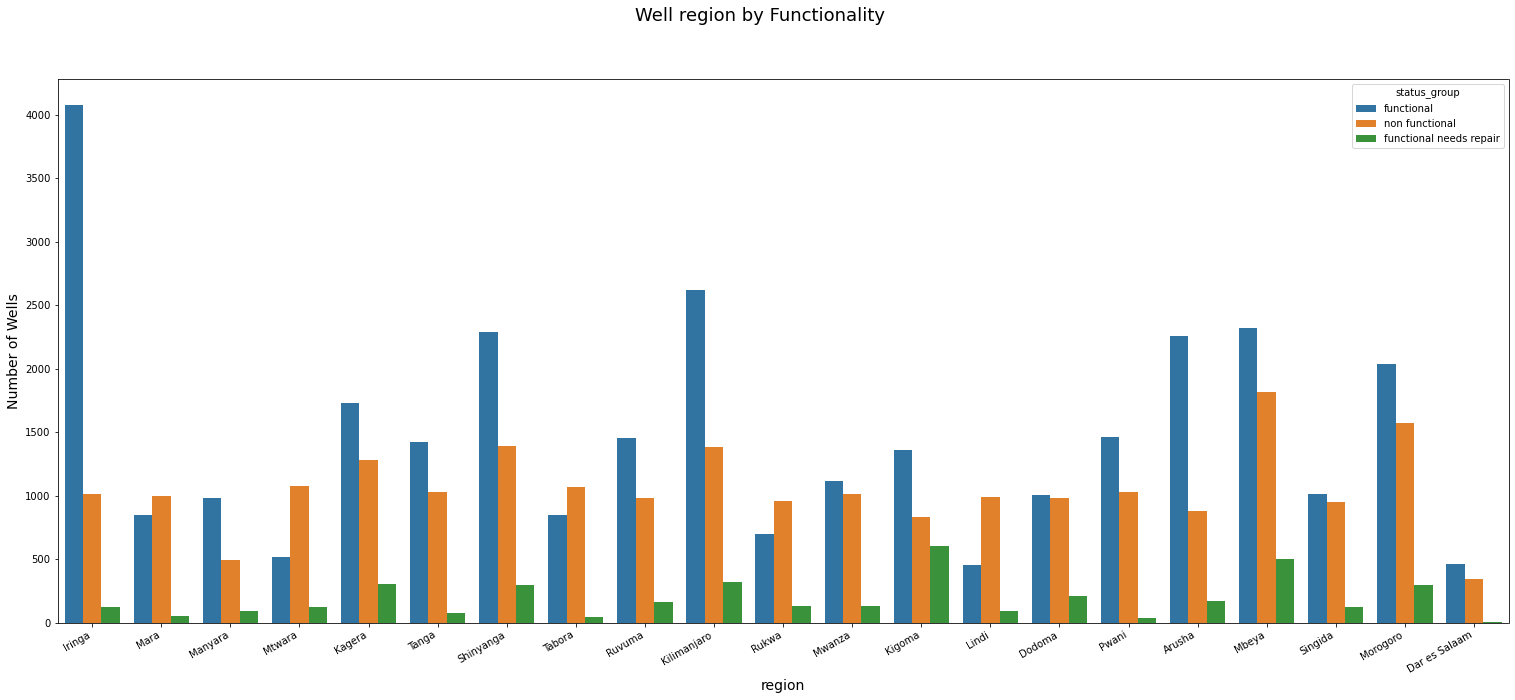

In [89]:
features = ['funder', 'region']

for feature in features:
    fig, ax = plt.subplots(figsize=(26, 10))
    ax = sns.countplot(data=df, x=df[feature], hue="status_group", palette='tab10')
    fig.suptitle(f"Well {feature} by Functionality", fontsize=18)
    plt.xlabel(f"{feature}", fontsize=14)
    plt.ylabel("Number of Wells", fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.show();

The Government of Tanzania is one of the biggest funders of wells along with the Roman Catholic Church and Danida. 

Most of the wells funded by the Government of Tanzania are non functional, while for the rest of the funders, there is a bigger proportion of functional wells compared to the non functional ones

Mtwara region and Lindi region stand out for having a higher proportion of non functional wells compared to the functional ones. 


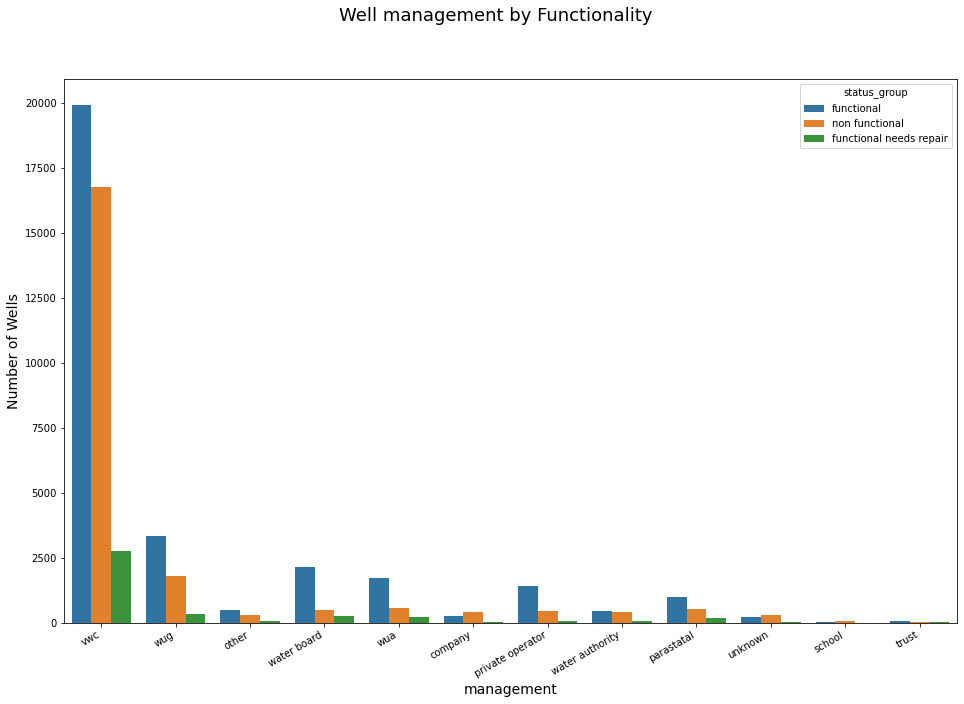

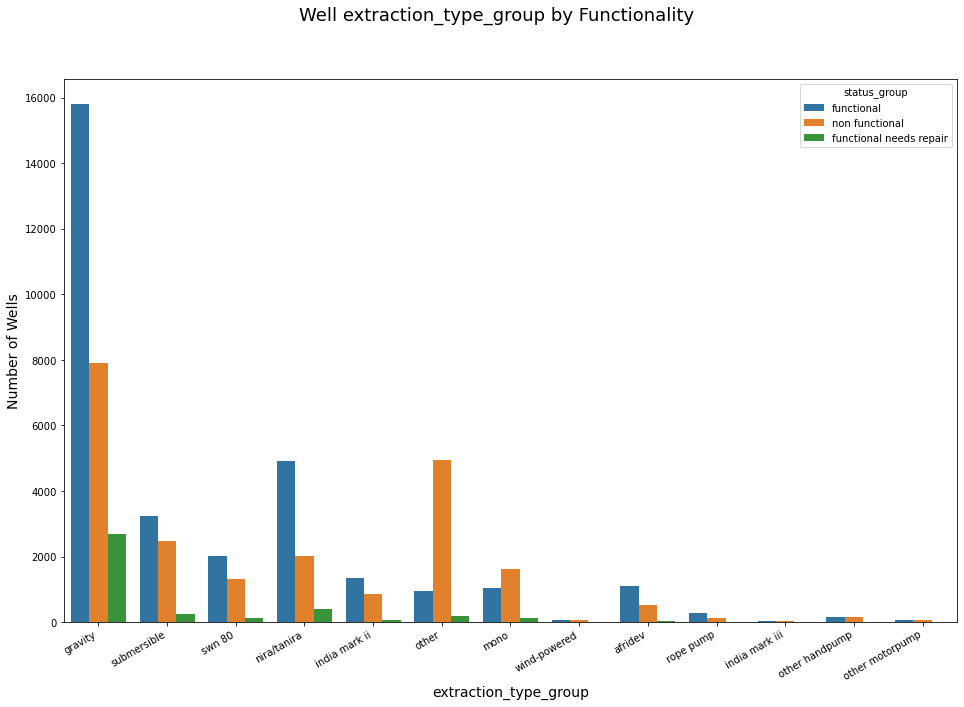

In [90]:
features = ['management', 'extraction_type_group']

for feature in features:
    fig, ax = plt.subplots(figsize=(16,10))
    ax = sns.countplot(data=df, x=df[feature], hue="status_group", palette='tab10')
    fig.suptitle(f"Well {feature} by Functionality", fontsize=18)
    plt.xlabel(f"{feature}", fontsize=14)
    plt.ylabel("Number of Wells", fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.show();

Wells managed by company and school have a higher proportion of non functional wells


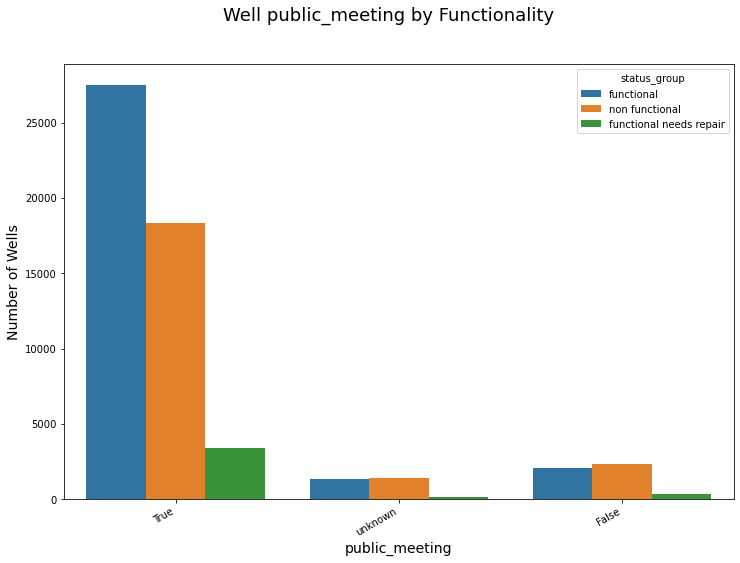

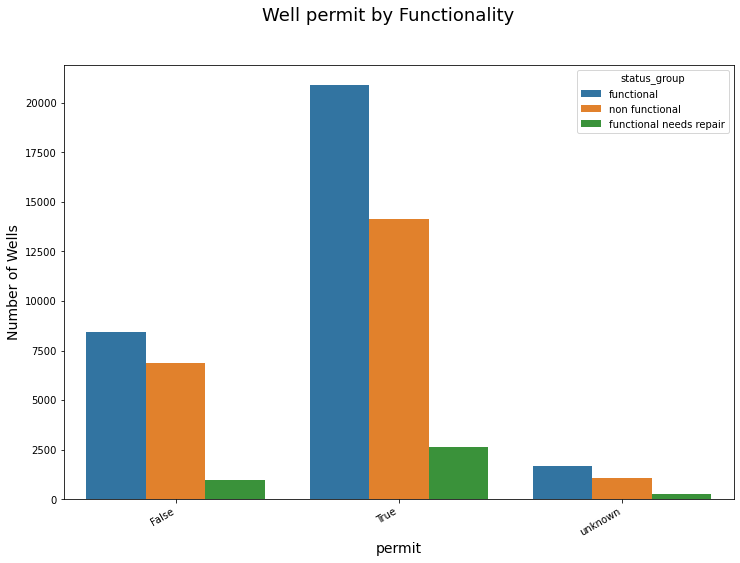

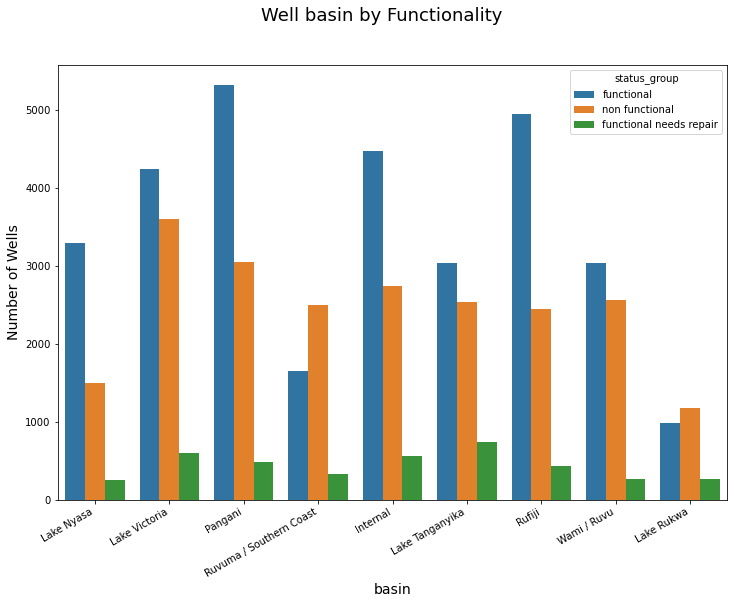

In [91]:
features = ['public_meeting', 'permit', 'basin'] 

for feature in features:
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = sns.countplot(data=df, x=df[feature], hue="status_group", palette='tab10')
    fig.suptitle(f"Well {feature} by Functionality", fontsize=18)
    plt.xlabel(f"{feature}", fontsize=14)
    plt.ylabel("Number of Wells", fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.show();

Wells where public meetings are held have a higher proportion of functional wells vs non functional ones whereas where there are no public meetings, more wells are non functional than functional

A higher proportion of non functional wells compared to functional wells are found in Ruvuma/Southern Coast and Lake Rukwa basin


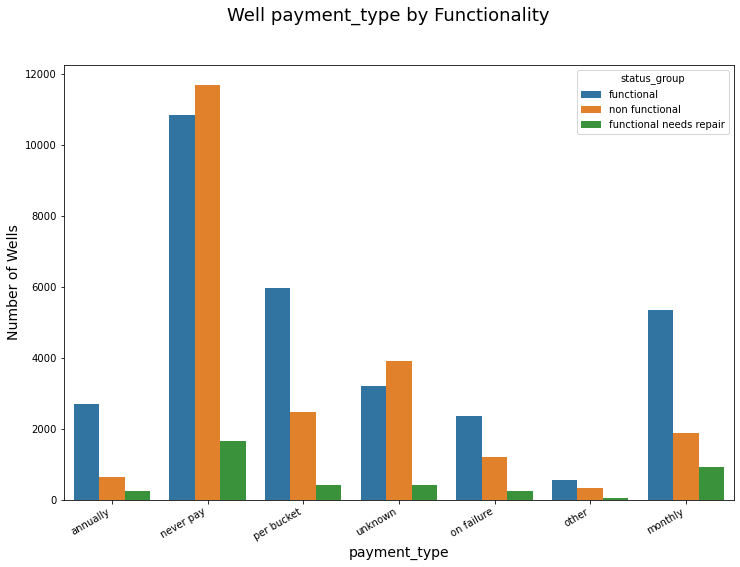

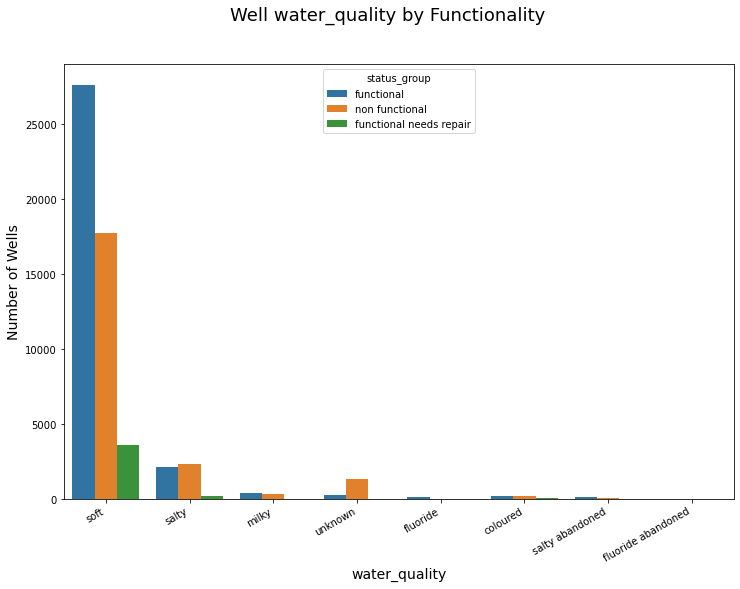

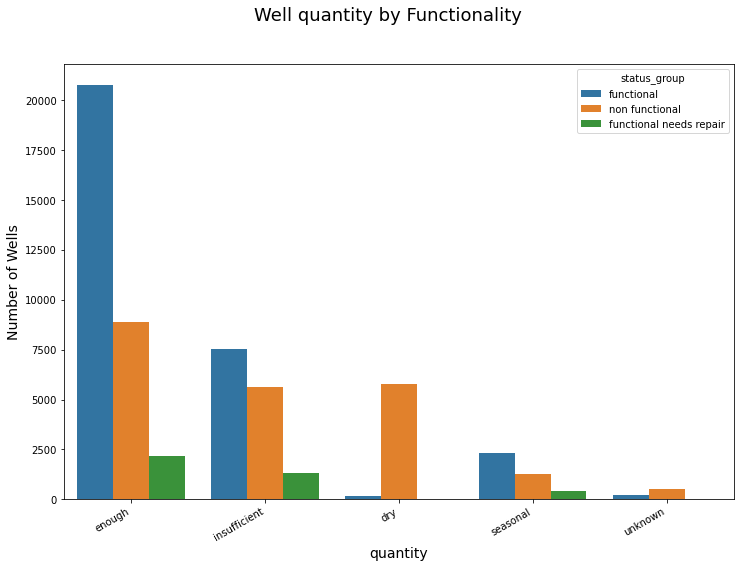

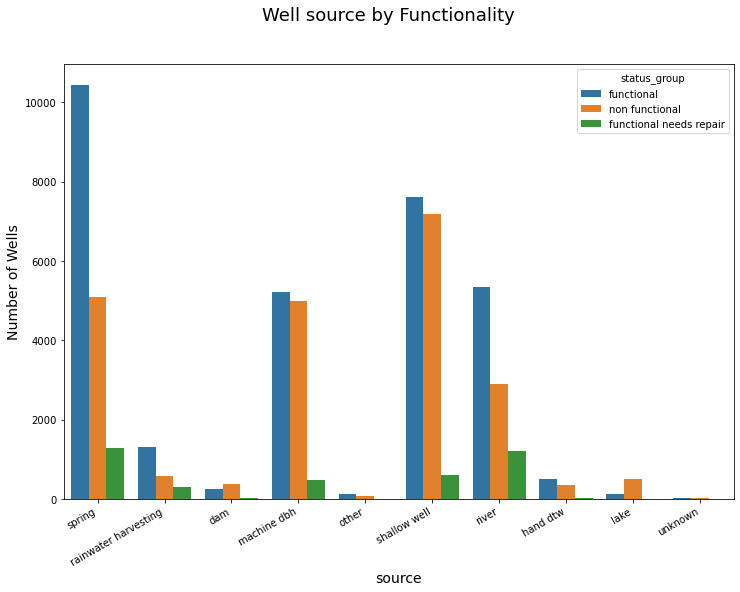

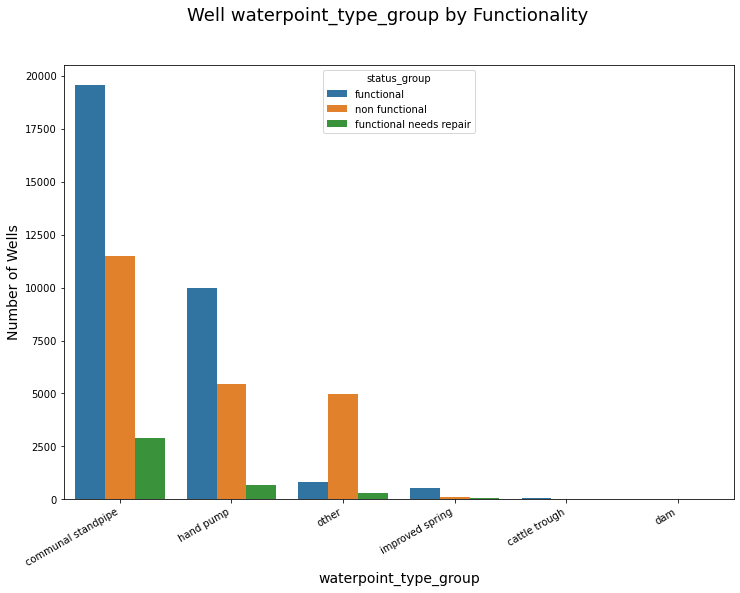

In [92]:
features = ['payment_type', 'water_quality','quantity', 'source', 'waterpoint_type_group']

for feature in features:
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = sns.countplot(data=df, x=df[feature], hue="status_group", palette='tab10')
    fig.suptitle(f"Well {feature} by Functionality", fontsize=18)
    plt.xlabel(f"{feature}", fontsize=14)
    plt.ylabel("Number of Wells", fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.show();

Where no payments are made or payment details are unknown there is a higher proportion of non functional wells compared to the functional ones. 

There are more non functional wells than functional ones where the source is dam or lake

Most of the wells known to be dry are non-functional

Non functional wells are more likely to have water quality that is either salty or unknown. 

### Numerical Variables

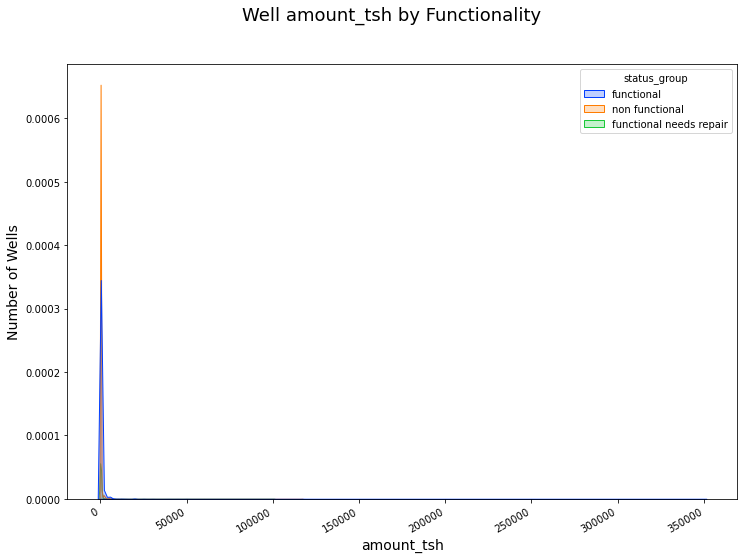

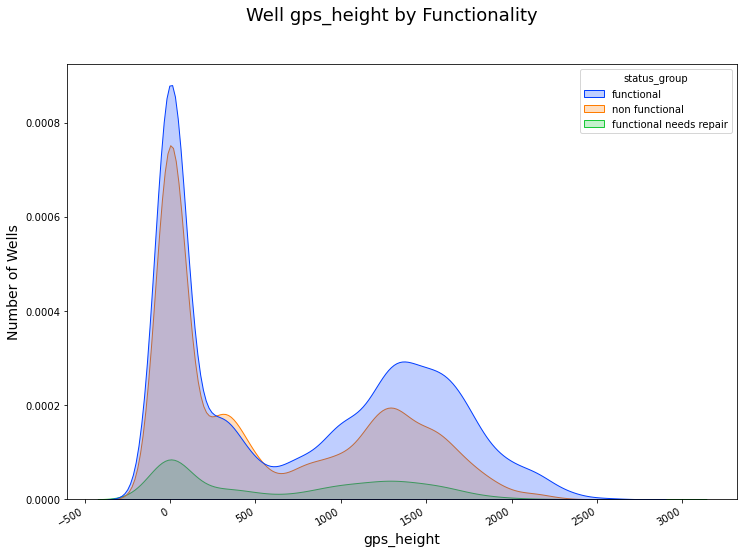

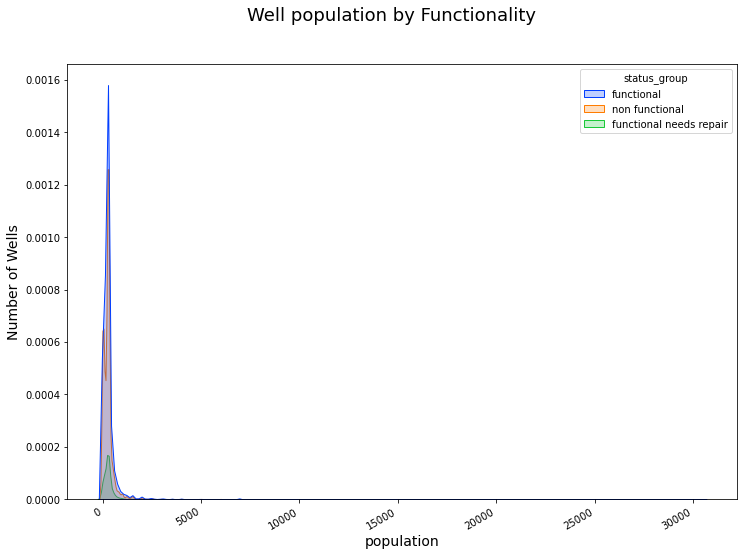

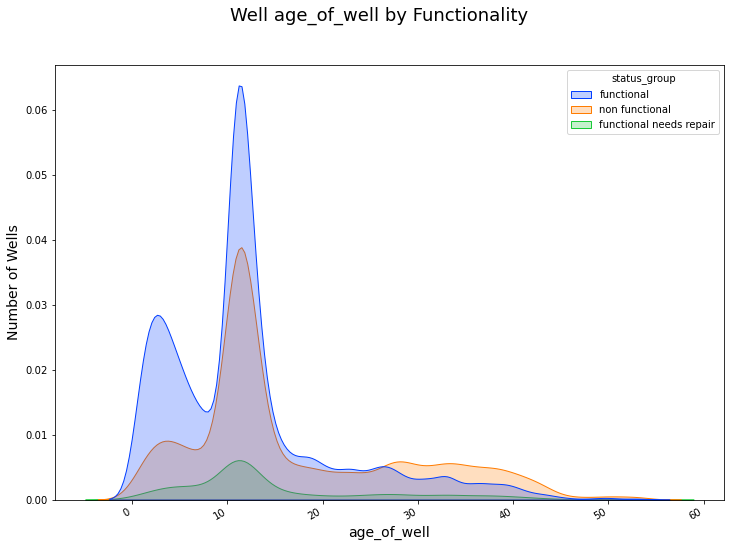

In [93]:
features = ['amount_tsh', 'gps_height', 'population', 'age_of_well']
for feature in features:
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = sns.kdeplot(data=df, x=df[feature], fill=True, hue="status_group", palette='bright')
    fig.suptitle(f"Well {feature} by Functionality", fontsize=18)
    plt.xlabel(f"{feature}", fontsize=14)
    plt.ylabel("Number of Wells", fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.show();



There is a higher proportion of functional wells between 0 and 15 years and a higher proportion of non functional wells from 30 years of age onwards. 

## Modeling

### Data Preprocessing

We start by encoding the target variable to be able to model it. 

In [94]:
#Converting the target variable into a ternary variable
vals = {'functional':1, 
        'non functional': 0, 
        'functional needs repair': 2} 
df['status_group'] = df['status_group'].replace(vals)

We'll then make a copy of our dataset to use in modeling and separate the X and y values. 

We'll also drop the longitude and latitude columns from the dataframe copy for modeling

In [95]:
#Making a copy of our dataset
df_model = df.copy()

In [96]:
#Dropping the longitude and latitude columns
df_model = df_model.drop(columns=['longitude', 'latitude'], axis=1)
df_model.head()

,status_group,amount_tsh,funder,gps_height,basin,region,population,public_meeting,permit,extraction_type_group,management,payment_type,water_quality,quantity,source,waterpoint_type_group,age_of_well
0,1,6000.0,R C Church,1390,Lake Nyasa,Iringa,109,True,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,12
1,1,0.0,Other,1399,Lake Victoria,Mara,280,unknown,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,3
2,1,25.0,Other,686,Pangani,Manyara,250,True,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,4
3,0,0.0,Unicef,263,Ruvuma / Southern Coast,Mtwara,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,27
4,1,0.0,Other,0,Lake Victoria,Kagera,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,11


We'll first identify the categorical and numerical columns for ease of one hot encoding

In [97]:
cat_cols = ['funder','basin','region', 'public_meeting', 'permit',
            'extraction_type_group','management','payment_type','water_quality',
            'quantity','source','waterpoint_type_group']

num_cols = ['amount_tsh', 'gps_height', 'population', 'age_of_well']

In [98]:
dummy = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

dummy.shape

(56991, 106)

In [99]:
#Defining the features and target
y = dummy['status_group']
X = dummy.drop(columns=['status_group'], axis=1)

In [100]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status_group, dtype: int64

We'll then split the data before we carry out any further transformations to prevent data leakage. For the purposes of splitting, we'll use the test_size 0.25 and random_state 42

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [102]:
#Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,amount_tsh,gps_height,population,age_of_well,funder_Dhv,funder_District Council,funder_Fini Water,funder_Government Of Tanzania,funder_Hesawa,funder_Kkkt,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,-0.102852,0.215929,-0.495843,-0.019698,-0.119622,-0.1229,-0.127336,-0.434882,-0.18672,-0.153105,...,-0.200002,-0.446466,-0.608286,1.544186,-0.033878,0.826435,-0.011849,-0.628097,-0.118206,-0.346215
1,-0.104426,-0.992250,-0.001172,-0.309192,-0.119622,-0.1229,-0.127336,-0.434882,-0.18672,-0.153105,...,-0.200002,2.239811,-0.608286,-0.647590,-0.033878,0.826435,-0.011849,-0.628097,-0.118206,-0.346215
2,0.052952,1.101544,-0.485136,-0.405690,-0.119622,-0.1229,-0.127336,-0.434882,-0.18672,-0.153105,...,-0.200002,-0.446466,1.643964,-0.647590,-0.033878,-1.210017,-0.011849,1.592111,-0.118206,-0.346215
3,-0.104426,-0.528563,0.896087,-0.019698,8.359660,-0.1229,-0.127336,-0.434882,-0.18672,-0.153105,...,-0.200002,-0.446466,1.643964,-0.647590,-0.033878,-1.210017,-0.011849,1.592111,-0.118206,-0.346215
4,-0.104426,-0.992250,-0.001172,-0.309192,-0.119622,-0.1229,-0.127336,-0.434882,-0.18672,-0.153105,...,-0.200002,-0.446466,-0.608286,-0.647590,-0.033878,0.826435,-0.011849,-0.628097,-0.118206,-0.346215


### Fitting the Models

### Dummy Model

We'll start by fitting a dummy classifier somewhat equal to guessing as a baseline model that we can how the rest of our models perform with. 

0.4487647389107243


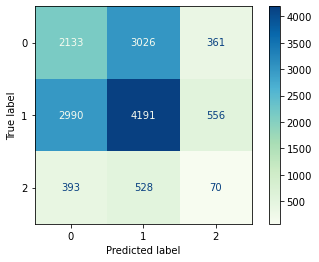

In [104]:
dummy = DummyClassifier(random_state=42)
dummy.fit(X_train, y_train)
print(dummy.score(X_test, y_test))

plot_confusion_matrix(dummy, X_test, y_test, cmap='GnBu');

Our dummy model has an accuracy score of 0.448 which means it makes correct predictions 44% of the times. This is worse than random guessing. 

To make evaluation of our models easier, we'll define an evaluation score function based on scikit learn's classification report, that also plots a confusion matrix. 

In [105]:
def eval_score(model, X, y_pred, y_true):
    target_labels= ['non func', 'func', 'func need rep']
    print(classification_report(y_true, y_pred, target_names=target_labels))
    
    #Confusion matrix    
    return plot_confusion_matrix(model, X, y_true, display_labels=target_labels, cmap='GnBu');

### Logistic Regression

In [106]:
#Fitting a Simple Logistic Regression Model
#Instantiating the model
log_base = LogisticRegression(multi_class='multinomial', random_state=42)
#fitting the model on training and testing data
log_base.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [107]:
y_hat_train = log_base.predict(X_train_scaled)
y_preds = log_base.predict(X_test_scaled)

Log_base model score:
               precision    recall  f1-score   support

     non func       0.78      0.63      0.70      5520
         func       0.71      0.90      0.80      7737
func need rep       0.40      0.03      0.06       991

     accuracy                           0.73     14248
    macro avg       0.63      0.52      0.52     14248
 weighted avg       0.72      0.73      0.71     14248



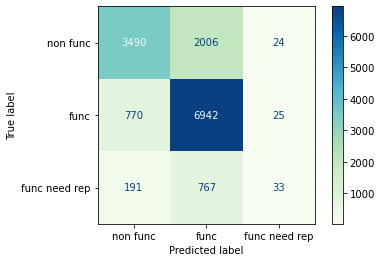

In [108]:
print("Log_base model score:")
log_base_score = eval_score(log_base, X_test_scaled, y_preds, y_test)

In [109]:
print('Logistic Baseline Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Logistic Bseline Validation Accuracy: ', accuracy_score(y_test, y_preds))

Logistic Baseline Training Accuracy:  0.738366516154692
Logistic Bseline Validation Accuracy:  0.7344890510948905


Our simple logistic regression model has an accuracy of 0.738. This means that it is predicting correctly 73% of the time. This is not bad for a vanilla model without any tuning.

We'll tune it further by adding an intercept and setting a high regularization parameter to see how it will perform

Log_reg model score:
               precision    recall  f1-score   support

     non func       0.78      0.63      0.70      5520
         func       0.71      0.90      0.80      7737
func need rep       0.40      0.03      0.06       991

     accuracy                           0.73     14248
    macro avg       0.63      0.52      0.52     14248
 weighted avg       0.72      0.73      0.71     14248



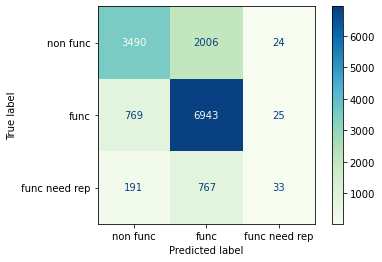

In [110]:
log_reg = LogisticRegression(multi_class='multinomial', fit_intercept=True, C=1e16, solver='lbfgs', random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_hat_train = log_reg.predict(X_train_scaled)
y_hat_test = log_reg.predict(X_test_scaled)
print("Log_reg model score:")
log_reg_score = eval_score(log_reg, X_test_scaled, y_hat_test, y_test)

In [111]:
print('Logistic Tuned Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Logistic Tuned Validation Accuracy: ', accuracy_score(y_test, y_preds))

Logistic Tuned Training Accuracy:  0.7382495379360363
Logistic Tuned Validation Accuracy:  0.7344890510948905


Even with the tuning, our model performance is still the same and our accuracy has remained constant at 0.73

We'll proceed to explore other models to determine which one will fit our data the best and then we can fine tune that particular model. 

###  Decision Trees

In [112]:
#Instantiating the decision tree classifier
clf_b = DecisionTreeClassifier(criterion='entropy', random_state=42)
#fitting the classifier on training data
#Using the non scaled data since decision trees are not sensitive to distances
clf_b.fit(X_train, y_train) 
#Predicting on the testing set
y_preds = clf_b.predict(X_test)
#calculating y_hat_train for the eval_score training accuracy
y_hat_train = clf_b.predict(X_train)

               precision    recall  f1-score   support

     non func       0.76      0.75      0.75      5520
         func       0.79      0.81      0.80      7737
func need rep       0.35      0.30      0.32       991

     accuracy                           0.75     14248
    macro avg       0.63      0.62      0.62     14248
 weighted avg       0.74      0.75      0.75     14248



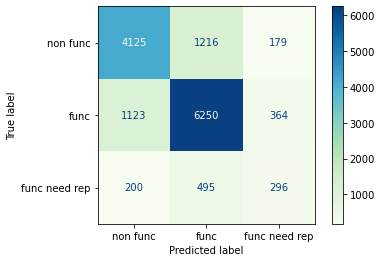

In [113]:
#Printing the model score
clf_b_score = eval_score(clf_b, X_test, y_preds, y_test)

In [114]:
print('CLF Baseline Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('CLF Baseline Validation Accuracy: ', accuracy_score(y_test, y_preds))

CLF Baseline Training Accuracy:  0.9482020447792621
CLF Baseline Validation Accuracy:  0.7489472206625492


This model has a training accuracy of 0.94 and a validation accuracy of 0.74, which suggests overfitting. 
We are going to make use of GridSearchCV to find an optimal combination of parameters that we can use to tune the model. 

In [115]:
#Defining the parameter grid
grid = {"criterion": ["gini", "entropy"], 
                 "max_depth": [None, 2, 5, 10, 20, 30], 
                 "min_samples_split": [5, 10, 15, 20, 30],
                 "min_samples_leaf": [2, 5, 10, 15]}

#Instantiating GridsearchCV
#gs_tree = GridSearchCV(clf_b, grid, cv=5)

# Fit to the data
#gs_tree.fit(X_train, y_train)

#print("Best Parameter Combination:")
#gs_tree.best_params_

We are going to use the features above produced by GridSearch to tune our model.

Best Parameter Combination:
{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

               precision    recall  f1-score   support

     non func       0.79      0.71      0.75      5520
         func       0.76      0.87      0.81      7737
func need rep       0.50      0.22      0.31       991

     accuracy                           0.76     14248
    macro avg       0.68      0.60      0.62     14248
 weighted avg       0.75      0.76      0.75     14248



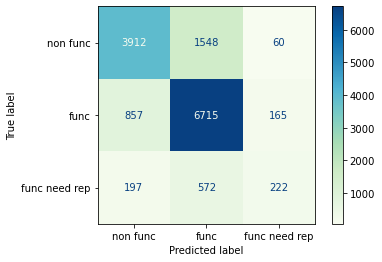

In [116]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5, min_samples_split=20) 
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
y_hat_train = clf.predict(X_train)
clf_score = eval_score(clf, X_test, y_preds, y_test)
clf_score

In [117]:
print('CLF Tuned Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('CLF Tuned Validation Accuracy: ', accuracy_score(y_test, y_preds))

CLF Tuned Training Accuracy:  0.8158762838359498
CLF Tuned Validation Accuracy:  0.7614402021336328


Tuning our model has slightly improved it. While training accuracy remains 0.81, validation accuracy has come up to 0.76. The closeness of the two values suggests the model is not overfitting. 

We'll investigate feature importances by making use of the function code below adapted from content notes. 

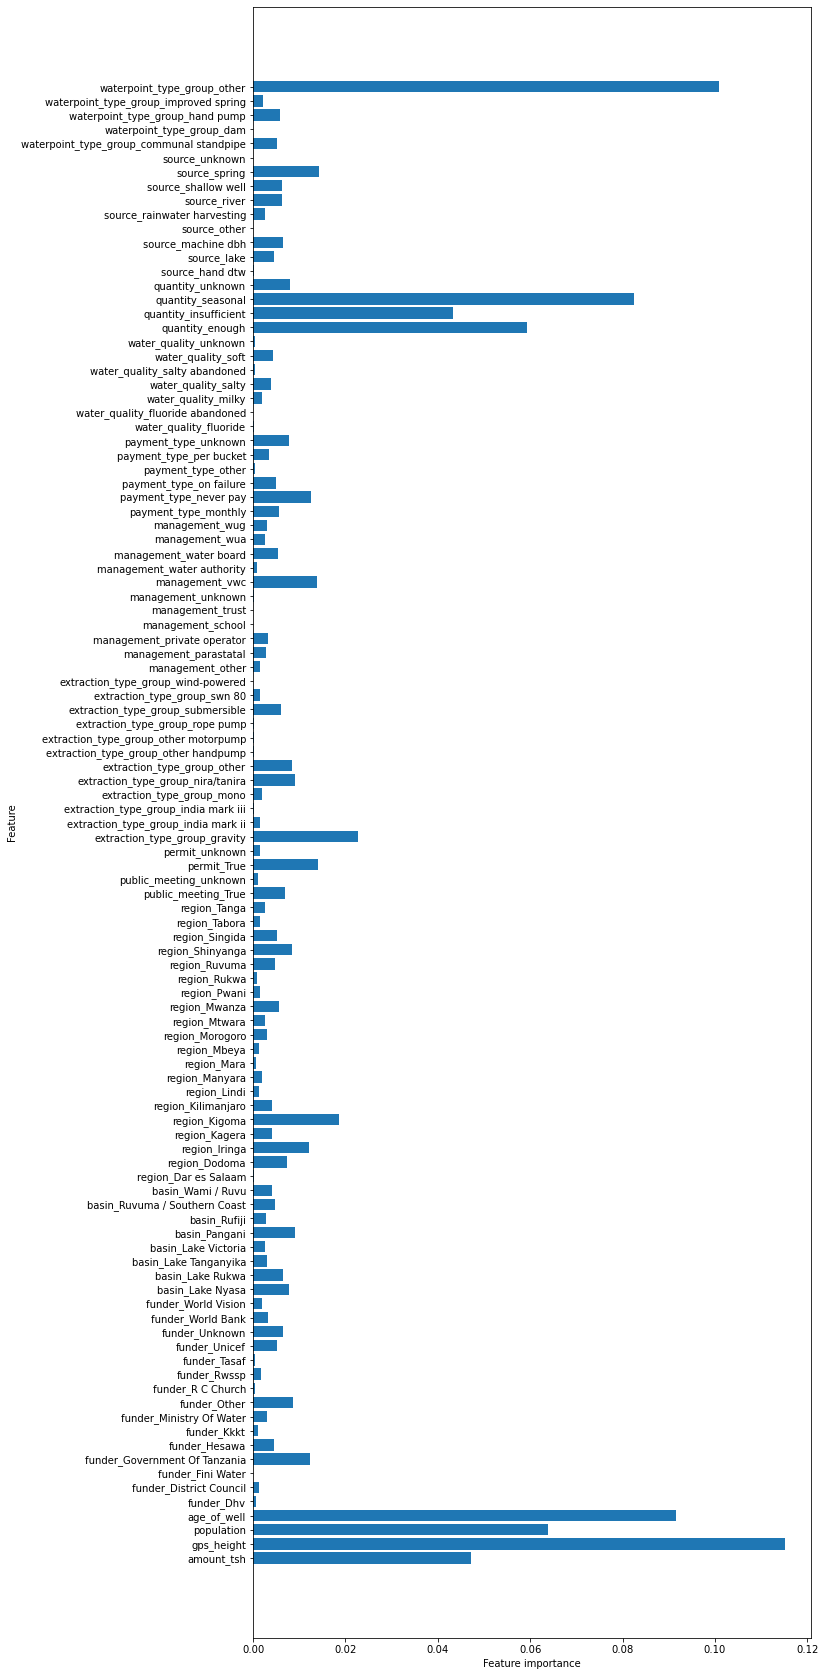

In [118]:
#Investigating Feature Importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

We'll try to make sense of the above features by picking the top 20 most important features

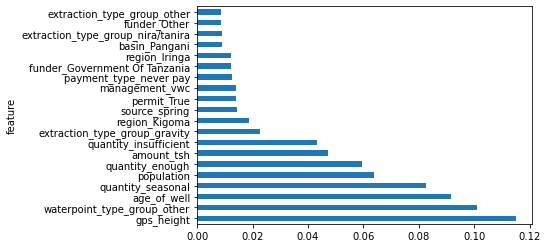

In [119]:
top_20_features = pd.DataFrame(columns=['feature','rank'])

top_20_features['feature']= X_train.columns

top_20_features['rank'] = clf.feature_importances_

top_20_features = top_20_features.set_index('feature')

top_20_features['rank'].sort_values(ascending = False).head(20).plot(kind='barh');

### Knn Model

In [120]:
# Instantiating the KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the classifier
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_preds = knn.predict(X_test_scaled)

#Predicting the y_hat_train
y_hat_train = knn.predict(X_train_scaled)

               precision    recall  f1-score   support

     non func       0.74      0.73      0.74      5520
         func       0.77      0.83      0.80      7737
func need rep       0.47      0.22      0.30       991

     accuracy                           0.75     14248
    macro avg       0.66      0.60      0.61     14248
 weighted avg       0.74      0.75      0.74     14248



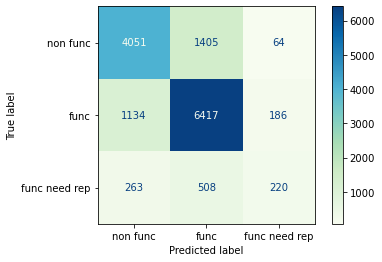

In [121]:
knn_score = eval_score(knn, X_test_scaled, y_preds, y_test)
knn_score

In [122]:
print('KNN Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('KNN Validation Accuracy: ', accuracy_score(y_test, y_preds))

KNN Training Accuracy:  0.812834850150902
KNN Validation Accuracy:  0.7501403705783268


One of the ways of tuning a KNN model is by iterating through various values of K to find the value that gives the best results. We will make use of grid search to iterate through several values of k to find an optimal value of k that we can use to tune the model. 

In [123]:
# GridSearch 
knn = KNeighborsClassifier()

knn_grid = {'n_neighbors' : [5, 10, 20, 30, 40]}

#knn_search = GridSearchCV(knn, knn_grid, cv=3)
#knn_search.fit(X_train_scaled, y_train)

#knn_search.best_params_

In [124]:
#Refitting the model with the best k value: {'n_neighbors': 5}
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_preds = knn2.predict(X_test_scaled)
y_hat_train = knn2.predict(X_train_scaled)

               precision    recall  f1-score   support

     non func       0.74      0.73      0.74      5520
         func       0.77      0.83      0.80      7737
func need rep       0.47      0.22      0.30       991

     accuracy                           0.75     14248
    macro avg       0.66      0.60      0.61     14248
 weighted avg       0.74      0.75      0.74     14248



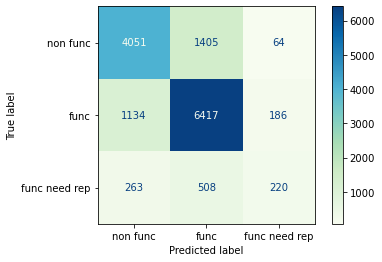

In [125]:
#Printing the model score
knn2_score = eval_score(knn2, X_test_scaled, y_preds, y_test)
knn2_score

In [126]:
print('KNN Tuned Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('KNN Tuned Validation Accuracy: ', accuracy_score(y_test, y_preds))

KNN Tuned Training Accuracy:  0.812834850150902
KNN Tuned Validation Accuracy:  0.7501403705783268


### Bagged Tree and Random Forest Models

In [127]:
#Instantiating the bagged tree classifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
#Fitting the classifier
bagged_tree.fit(X_train, y_train)

# Training accuracy score
training_accuracy_score = bagged_tree.score(X_train, y_train)
print("Test Accuracy Score:", training_accuracy_score)

# Test accuracy score
test_accuracy_score = bagged_tree.score(X_test, y_test)
print("Test Accuracy Score:", test_accuracy_score)

Test Accuracy Score: 0.7216386308869288
Test Accuracy Score: 0.7188377316114543


In [128]:
# Instantiating a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

#Fitting the classifier
forest.fit(X_train, y_train)

#Predicting the train and test data
y_preds = forest.predict(X_test)
y_hat_train = forest.predict(X_train)


               precision    recall  f1-score   support

     non func       0.84      0.40      0.54      5520
         func       0.64      0.96      0.77      7737
func need rep       0.00      0.00      0.00       991

     accuracy                           0.68     14248
    macro avg       0.49      0.45      0.44     14248
 weighted avg       0.67      0.68      0.63     14248



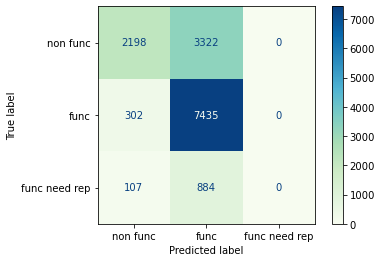

In [129]:
rf_score = eval_score(forest, X_test, y_preds, y_test)
rf_score

In [130]:
print('Forest Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Forest Validation Accuracy: ', accuracy_score(y_test, y_preds))

Forest Training Accuracy:  0.679222328802377
Forest Validation Accuracy:  0.676094890510949


While bagged tress and random forests have not registered the highest accuracy scores, they are so far the ones with the most consistent performance in both the training and test sets. 

We will use GridSearchCV to find optimal values to tune the parameters.  

In [131]:
#Specifying parameters
#forest = RandomForestClassifier()

#forest_grid = {
#    'criterion' : ['entropy', 'gini'],
#    'max_depth': [None, 5, 10, 15, 20],
#    'min_impurity_split' : [None, 0.1, 0.3, 0.5],
#    'min_impurity_decrease' : [0.0, 0.1, 0.2, 0.4, 0.5]}
#    'min_samples_leaf': [1, 2, 5], 
#    'min_samples_split': [2, 4, 6]}

#forest_gs = GridSearchCV(forest, forest_grid, cv=3)
#forest_gs.fit(X_train, y_train)

#print("Random Forest Best Parameters")
#forest_gs.best_params_

We conducted two separate Gridsearches due to the time taken by a single search. 

The following parameters were initially suggested by GridSearchCV 

Random Forest Best Parameters
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 6}
{'criterion': 'entropy', 'max_depth': 20, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.3}

Random forest being our best performing model thus far, we tweaked them around a bit in the tuned model to come up with the below hyperparameters combination which gave us the best scores as well as a good balance between the training and validation accuracy. 

               precision    recall  f1-score   support

     non func       0.84      0.73      0.78      5520
         func       0.77      0.91      0.84      7737
func need rep       0.57      0.21      0.31       991

     accuracy                           0.79     14248
    macro avg       0.73      0.62      0.64     14248
 weighted avg       0.79      0.79      0.78     14248



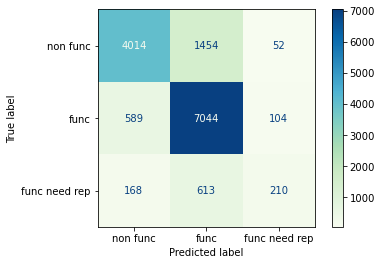

In [132]:
#Refitting the model with the best parameters identified by GridSearchCV
tuned_forest = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=20, 
                                      min_impurity_split=0.2, random_state=42)

tuned_forest.fit(X_train_scaled, y_train)

#Predicting the train and test data
y_preds = tuned_forest.predict(X_test_scaled)
y_hat_train = tuned_forest.predict(X_train_scaled)

#Evaluating the model
tuned_rf_score = eval_score(tuned_forest, X_test_scaled, y_preds, y_test)
tuned_rf_score

In [133]:
print('Tuned Forest Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Tuned Forest Validation Accuracy: ', accuracy_score(y_test, y_preds))

Tuned Forest Training Accuracy:  0.8947196032098823
Tuned Forest Validation Accuracy:  0.7908478382930938


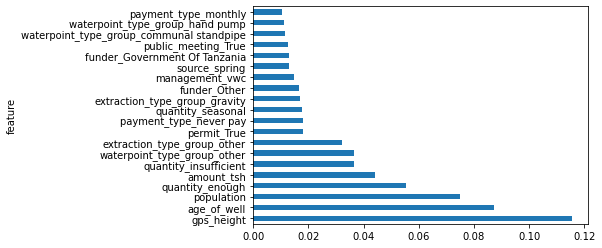

In [134]:
#Investigating Features Importance 
top_20_rf_features = pd.DataFrame(columns=['feature','rank'])

top_20_rf_features['feature']= X_train.columns

top_20_rf_features['rank'] = tuned_forest.feature_importances_

top_20_rf_features = top_20_rf_features.set_index('feature')

top_20_rf_features['rank'].sort_values(ascending = False).head(20).plot(kind='barh');

The tuned random forest model has a training accuracy of 0.89 and a test accuracy of 0.79. We'll tune it a little further in this section using SMOTE to account for the class imbalances in our target variable and evaluate its performance. 

In [135]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

smote_rf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=20, min_impurity_split=0.1, random_state=42)
#Fitting the model 
smote_rf.fit(X_train_resampled, y_train_resampled)

y_preds = smote_rf.predict(X_test_scaled)
y_hat_train = smote_rf.predict(X_train_scaled)


               precision    recall  f1-score   support

     non func       0.83      0.74      0.78      5520
         func       0.82      0.79      0.80      7737
func need rep       0.30      0.54      0.38       991

     accuracy                           0.76     14248
    macro avg       0.65      0.69      0.66     14248
 weighted avg       0.79      0.76      0.77     14248



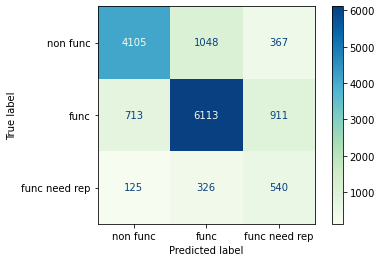

In [136]:
smote_rf_score = eval_score(smote_rf, X_test_scaled, y_preds, y_test)
smote_rf_score

In [137]:
print('Smote Forest Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Smote Forest Validation Accuracy: ', accuracy_score(y_test, y_preds))

Smote Forest Training Accuracy:  0.8683995040123529
Smote Forest Validation Accuracy:  0.7550533408197642


In [138]:
scores = cross_val_score(smote_rf, X_train_resampled, y_train_resampled, cv=5)
scores

array([0.77827989, 0.8343017 , 0.83444516, 0.84427229, 0.84269421])

SMOTE does not seem to be improving our model performance any further. On the contrary, it is making it worse. We will therefore take the tuned random forest as our best performing and final model. 

## Final Model

Our final model will be selected based on performance. To do this, we'll compare the training and testing accuracy of the various models that we fitted to find out which model gives the best scores without overfitting. 

In [139]:
data = {
    'Model': ['Logistic Regression', 'Tuned Logistic Regression', 'Decision Tree Classifier', 
              'Tuned Decision Tree Classifier', 'K Nearest Neighbors', 'Tuned K Nearest Neighbors', 
              'Bagged Trees', 'Random Forest', 'Tuned Random Forest','SMOTE Random Forest'],
    'Training Accuracy Score': [0.738, 0.738, 0.948, 0.815, 0.812, 0.812, 0.719, 0.689, 0.894, 0.871],
    'Testing Accuracy Score': [0.734, 0.734, 0.748, 0.760, 0.750, 0.750, 0.716, 0.686, 0.790, 0.750]
}
Model_outputs = pd.DataFrame(data)

Model_outputs

,Model,Training Accuracy Score,Testing Accuracy Score
0,Logistic Regression,0.738,0.734
1,Tuned Logistic Regression,0.738,0.734
2,Decision Tree Classifier,0.948,0.748
3,Tuned Decision Tree Classifier,0.815,0.760
4,K Nearest Neighbors,0.812,0.750
5,Tuned K Nearest Neighbors,0.812,0.750
6,Bagged Trees,0.719,0.716
7,Random Forest,0.689,0.686
8,Tuned Random Forest,0.894,0.790
9,SMOTE Random Forest,0.871,0.750


The tuned random forest model is our best performing model with a training accuracy of 0.894 and a testing accuracy of 0.798. Although it's not the best performed in training accuracy, it has the best testing accuracy and minimal difference between the training and testing accuracy meaning that the training model had the less overfit. 

## Findings 

There is a high proportion of non-functional wells accounting for 38% of the total wells. Together with the functioning wells that need repair, they account for 45% of all the wells. 

The most important features in predicting well function as depicted by our final model are 

1. Altitude of the well (gps_height)
2. Well age (age_of_well)
3. Population (population)
4. Enough water quantity (quantity_enough)
5. Amount of water in total static head (amount_tsh)
6. Insufficient water quantity (quantity_insufficient)
7. The waterpoint kind (waterpoint_type_group_other)
8. The kind of extraction used by the waterpoint(extraction_type_group_other)
9. Well having a permit(permit_True)
10. Well where payment is not made (payment_type_never pay)

The tuned Decision Tree Classifier which also scored highly also has the same 9 features being ranked as the most important in predicting well function. 

Well projects funded by the Government of Tanzania and the Ministry of Water are more likely to be non functional. 

Mtwara and Lindi Regions stand out for having a higher proportion of non-functional wells compared to the functional wells. Ruvuma/Southern Coast and L. Rukwa basin also have a higher proportion of non functional wells compared to the functional ones. 

Well projects where people do not pay for well use or the payment details are unknown, and where public meetings are not held, have a higher proportion of non functional wells compared to the functional wells.  

Well projects that are older have a higher proportion of non functional wells than the ones that are recent(0 - 15 years). 

Dry wells, wells with salty water and wells with dam and lake as a source were more likely to be non-functional. 

## Recommendations

Well projects being funded by the government and its ministry should be thus be closely monitored during the installation and followed closely to ensure continued function

Mtwara and Lindi Regions and wells in Ruvuma/Southern Coast and L. Rukwa basin should be prioritized in repair of non functional and functional wells that need repair.

Introduce and promote well fees and public meetings to enhance community ownership which will translate to better maintenance and follow-up of wells. The money generated from the fees can aid in maintenance and repairs in a timely manner.

Older wells, dry wells and wells with salty water should be monitored more closely as they are more likely to fail 

## Further Analysis

**Further hyperparameter tuning:** Hyperparameter tuning can be explored further using GridSearch to further improve on the models used in prediction. 

**Exploring more model types** Model types such as XGBoost, Adaboosting, Naive Bayes, SVM and model stacking that were not used here can be explored to find a better performing model. 

**More Information on Data Features** Some symbols and abbreviations used in the data are not universal. More information on the data can enhance the data cleaning process especially in the funders and installers features to enhance the cleaning process and consequently the model outputs. 